<h1>1) Data Collection</h1>

<h2>1.1 Import Data and Required Packages</h2>

In [81]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [8]:
df = pd.read_csv('data\stud.csv')

In [9]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


**Shape of the Dataset**

In [10]:
df.shape

(1000, 8)

<h1>2) Data Checks to perform</h1>

<h2>3.1 check missing values</h2>

In [11]:
## CHECK MISSING VALUES
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

**no missing values**

<h2>3.2 check duplicates</h2>

In [12]:
df.duplicated().sum()

np.int64(0)

**no duplicates**

<h2>3.3 check data types</h2>

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


<h2>3.4 Checking the number of unique values of each column</h2>

In [14]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

<h2>3.5 statistics of the dataset</h2>

In [15]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


**Insight**
<li>From above description of numerical data, all means are very close to each other - between 66 and 68.05</li>
<li>All standard deviations are also close - between 14.6 and 15.19;</li>
<li>While there is a minimum score 0 for math, for writing minimum is much higher = 10 and for reading much higher = 17</li>

<h2>3.6 Exploring Data</h2>

<Axes: >

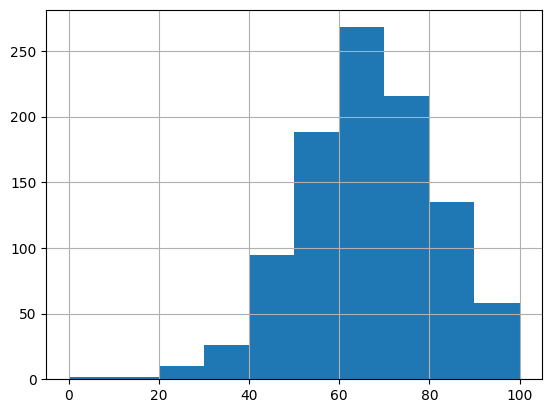

In [16]:
df.math_score.hist()

In [17]:
for feature in df.columns:
    if df[feature].dtypes == 'O':
        print(f"feature {feature} ini memiliki unique value: {df[feature].unique()}\n")
        print("-"*100 + "\n")

feature gender ini memiliki unique value: ['female' 'male']

----------------------------------------------------------------------------------------------------

feature race_ethnicity ini memiliki unique value: ['group B' 'group C' 'group A' 'group D' 'group E']

----------------------------------------------------------------------------------------------------

feature parental_level_of_education ini memiliki unique value: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']

----------------------------------------------------------------------------------------------------

feature lunch ini memiliki unique value: ['standard' 'free/reduced']

----------------------------------------------------------------------------------------------------

feature test_preparation_course ini memiliki unique value: ['none' 'completed']

----------------------------------------------------------------------------------------------------



In [18]:
continous_features = [feature for feature in df.columns if df[feature].dtypes != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtypes == 'O']

print(f'ada {len(continous_features)} feature continous dan {len(categorical_features)} feature kategorikal')
print(f"continous featurenya : {continous_features}")
print(f"kategorikal featurenya : {categorical_features}")

ada 3 feature continous dan 5 feature kategorikal
continous featurenya : ['math_score', 'reading_score', 'writing_score']
kategorikal featurenya : ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


<h2>3.8 Adding columns for "Total Score" and "Average"</h2>

In [19]:
df['total_score'] = df['math_score'] + df['reading_score'] + df['writing_score']
df['average'] = df['total_score']/3
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [20]:
perfect_reading_score = df[df['reading_score'] == 100]['reading_score'].count() # calling reading score to only show count for one column
perfect_math_score = df[df['math_score'] == 100]['math_score'].count() # calling math score to only show count for one column
perfect_writing_score = df[df['writing_score'] == 100]['writing_score'].count() # calling writing score to only show count for one column

print(f"ada {perfect_reading_score} orang yang memiliki reading score 100")
print(f"ada {perfect_math_score} orang yang memiliki math score 100")
print(f"ada {perfect_writing_score} orang yang memiliki writing score 100")

ada 17 orang yang memiliki reading score 100
ada 7 orang yang memiliki math score 100
ada 14 orang yang memiliki writing score 100


In [21]:
reading_less_20 = df[df['reading_score'] <= 20]['reading_score'].count()
math_less_20 = df[df['math_score'] <= 20]['math_score'].count()
writing_less_20 = df[df['writing_score'] <= 20]['writing_score'].count()

print(f"ada {reading_less_20} orang yang memiliki reading score kurang dari 20")
print(f"ada {math_less_20} orang yang memiliki math score kurang dari 20")
print(f"ada {writing_less_20} orang yang memiliki writing score kurang dari 20")

ada 1 orang yang memiliki reading score kurang dari 20
ada 4 orang yang memiliki math score kurang dari 20
ada 3 orang yang memiliki writing score kurang dari 20


<h1>4. Visualization</h1>

<h2>4.1 Histogram & KDE</h2>

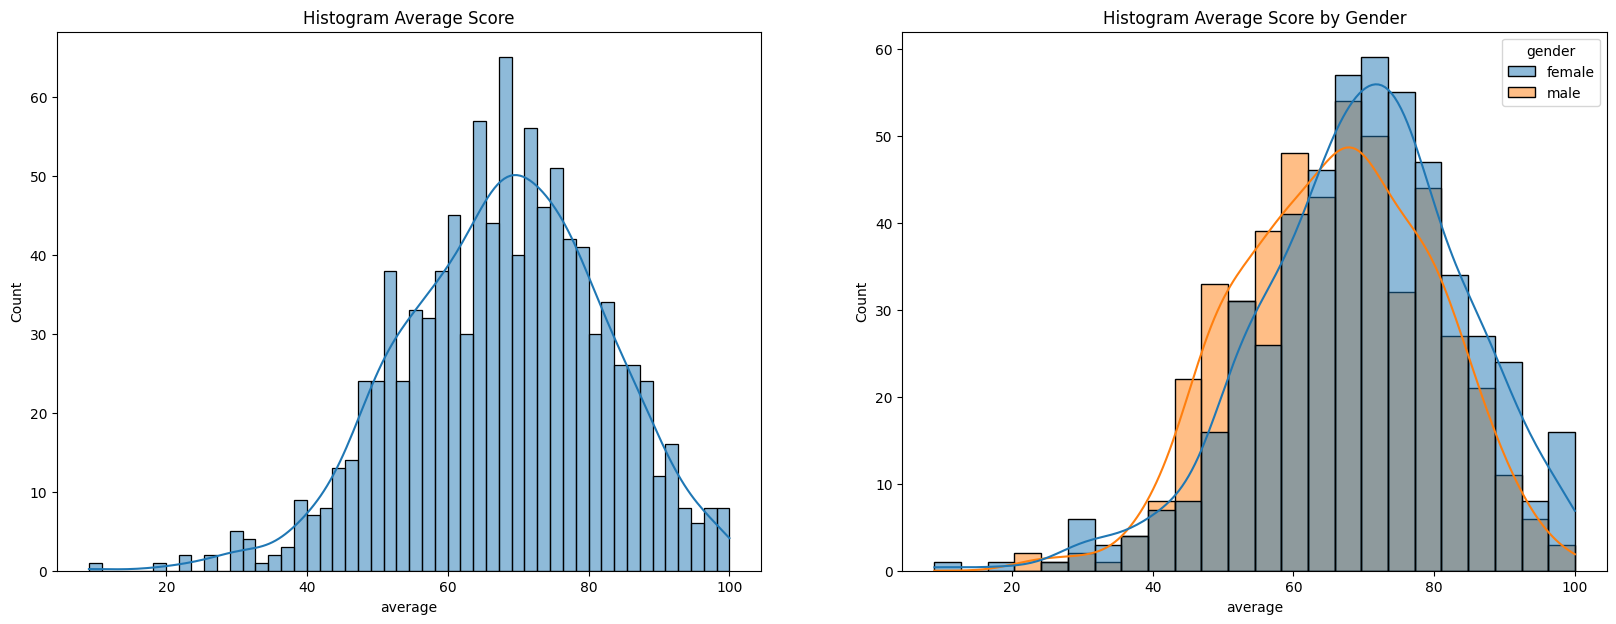

In [22]:
fig, axs = plt.subplots(1, 2, figsize=(20, 7))

sns.histplot(data=df, x='average', kde=True, bins=50, ax=axs[0])
axs[0].set_title("Histogram Average Score")

sns.histplot(data=df, x='average', kde=True, hue='gender', ax=axs[1])
axs[1].set_title("Histogram Average Score by Gender")
plt.show()

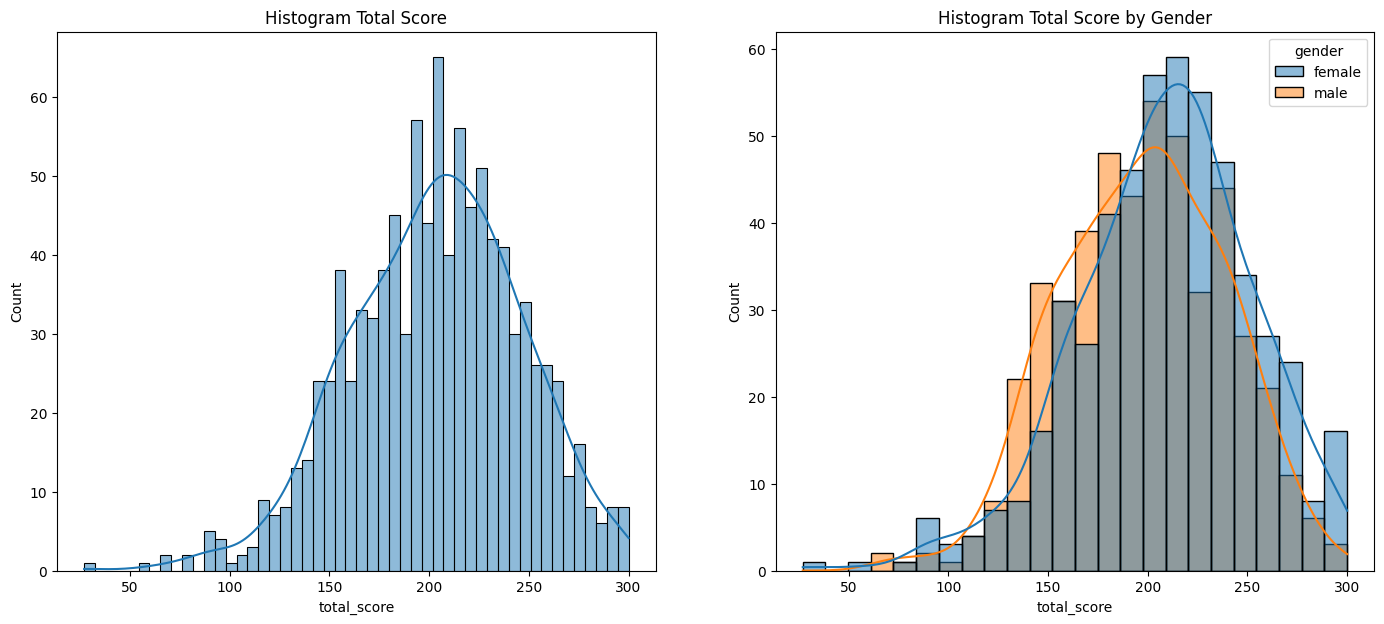

In [23]:
fig, axs = plt.subplots(1, 2, figsize=(17, 7)) # create a figure with size 17x7 and it can contain 1 row and 2 columns of subplot

sns.histplot(data=df, x='total_score', kde=True, bins=50, ax=axs[0])
axs[0].set_title("Histogram Total Score")

sns.histplot(data=df, x='total_score', kde=True, hue='gender', ax=axs[1])
axs[1].set_title("Histogram Total Score by Gender")
plt.show()

**insight**

<ul>
    <li>siswa perempuan cenderung lebih baik score nilainya dibanding siswa laki-laki</li>
</ul>

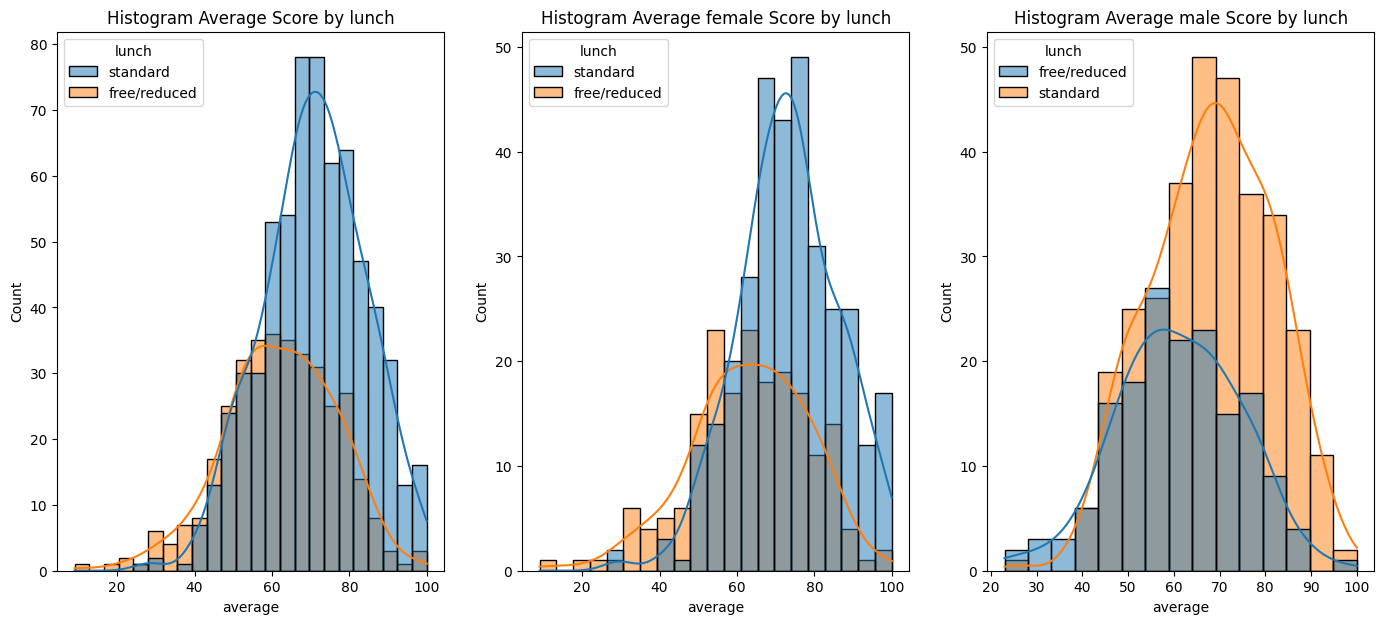

In [24]:
fig, axs = plt.subplots(1, 3, figsize=(17, 7)) # create a figure with size 17x7 and it can contain 1 row and 3 columns of subplot

sns.histplot(data=df, x='average', kde=True, hue='lunch', ax=axs[0])
axs[0].set_title("Histogram Average Score by lunch")

sns.histplot(data=df[df['gender'] == 'female'], x='average', kde=True, hue='lunch', ax=axs[1])
axs[1].set_title("Histogram Average female Score by lunch")

sns.histplot(data=df[df['gender'] == 'male'], x='average', kde=True, hue='lunch', ax=axs[2])
axs[2].set_title("Histogram Average male Score by lunch")
plt.show()

**insights**

<ul>
    <li>lunch yang standard cenderung membantu siswa dalam ujian</li>
    <li>lunch yang standard cenderung membantu siswa pria dan wanita dalam ujian</li>
</ul>

In [25]:
df.columns

Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score', 'total_score', 'average'],
      dtype='object')

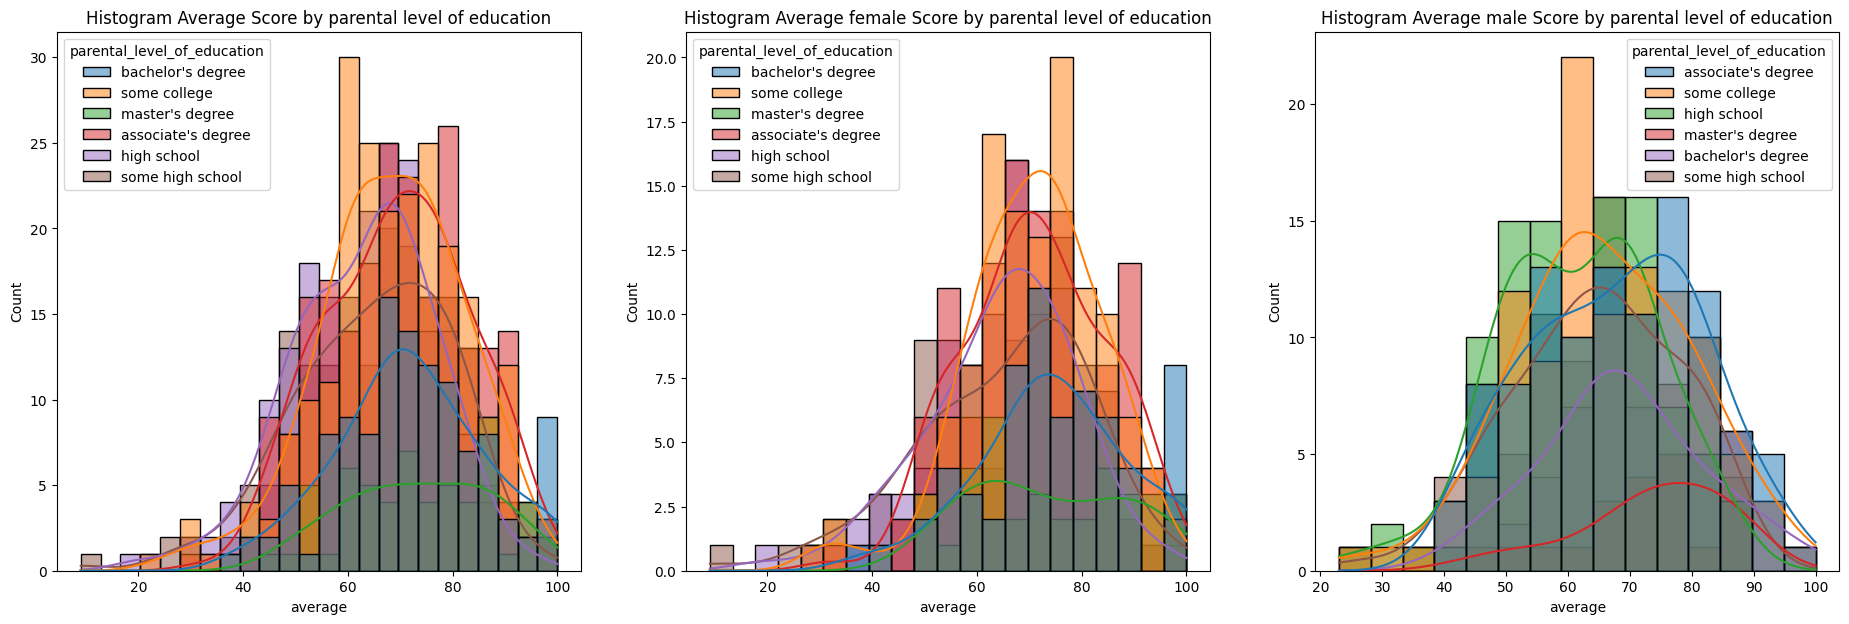

In [26]:
fig, axs = plt.subplots(1, 3, figsize=(23, 7)) # create a figure with size 17x7 and it can contain 1 row and 3 columns of subplot

sns.histplot(data=df, x='average', kde=True, hue='parental_level_of_education', ax=axs[0])
axs[0].set_title("Histogram Average Score by parental level of education")

sns.histplot(data=df[df['gender'] == 'female'], x='average', kde=True, hue='parental_level_of_education', ax=axs[1])
axs[1].set_title("Histogram Average female Score by parental level of education")

sns.histplot(data=df[df['gender'] == 'male'], x='average', kde=True, hue='parental_level_of_education', ax=axs[2])
axs[2].set_title("Histogram Average male Score by parental level of education")
plt.show()

**insights**

<ul>
    <li>secara umum, tingkat pendidikan orang tua tidak berefek terhadap nilai ujian siswa</li>
    <li>di histogram kedua, dapat dilihat bahwa siswa lelaki yang tingkat pendidikan orang tuanya s1 atau s2 cenderung bagus ujiannya </li>
    <li>di histogram ketiga, tingkat pendidikan orang tua tidak berefek terhadap nilai ujian siswa perempuan</li>
</ul>

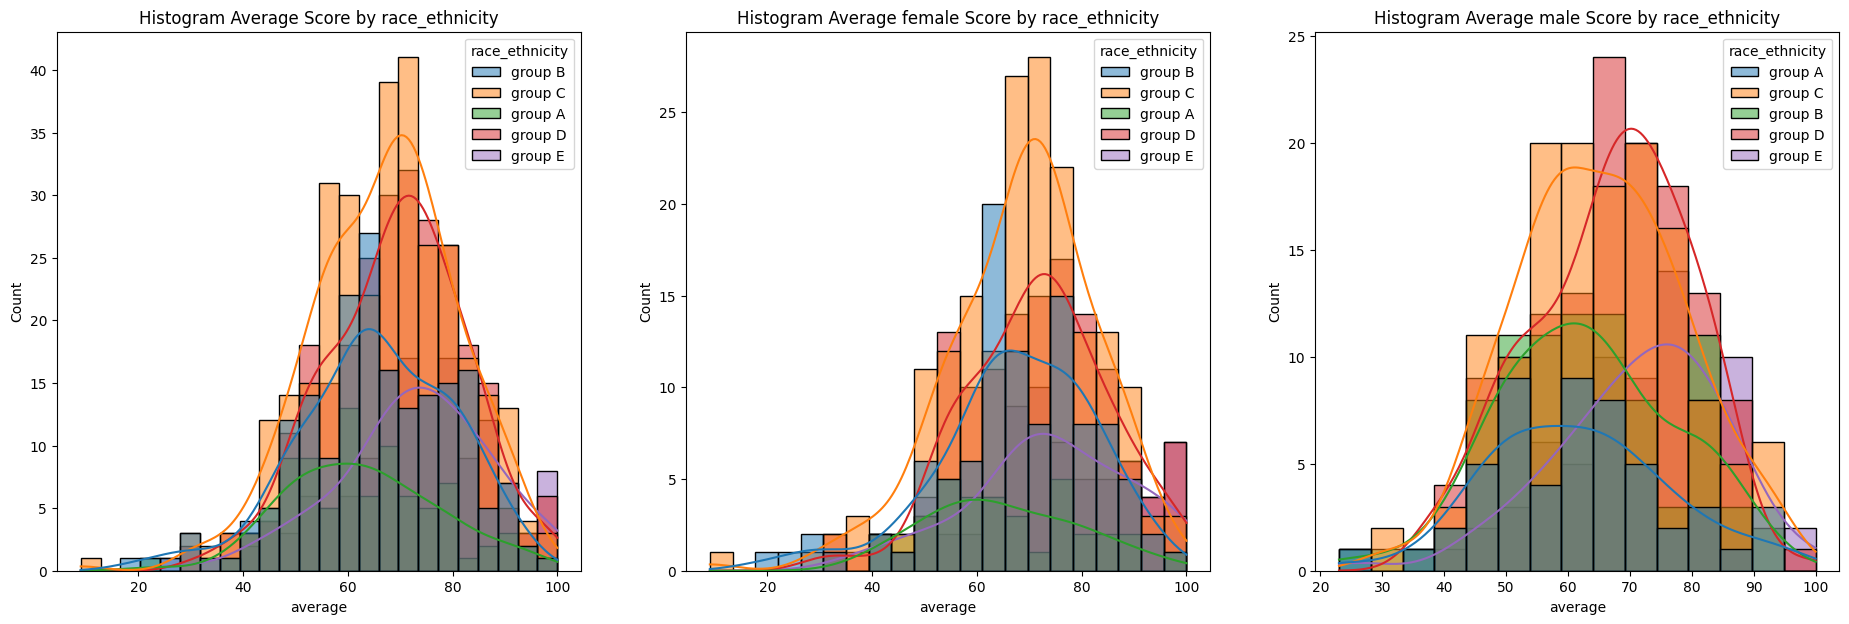

In [27]:
fig, axs = plt.subplots(1, 3, figsize=(23, 7)) # create a figure with size 17x7 and it can contain 1 row and 3 columns of subplot

sns.histplot(data=df, x='average', kde=True, hue='race_ethnicity', ax=axs[0])
axs[0].set_title("Histogram Average Score by race_ethnicity")

sns.histplot(data=df[df['gender'] == 'female'], x='average', kde=True, hue='race_ethnicity', ax=axs[1])
axs[1].set_title("Histogram Average female Score by race_ethnicity")

sns.histplot(data=df[df['gender'] == 'male'], x='average', kde=True, hue='race_ethnicity', ax=axs[2])
axs[2].set_title("Histogram Average male Score by race_ethnicity")
plt.show()

**insights**

<ul>
    <li>siswa dari grup A dan B agak cenderung memiliki nilai ujian yang rendah</li>
    <li>siswa dari grup A dan B agak cenderung memiliki nilai ujian yang rendah terlepas gendernya lelaki atau wanita</li>
</ul>

<h2>4.2 Maximum score of students in all three subjects</h2>

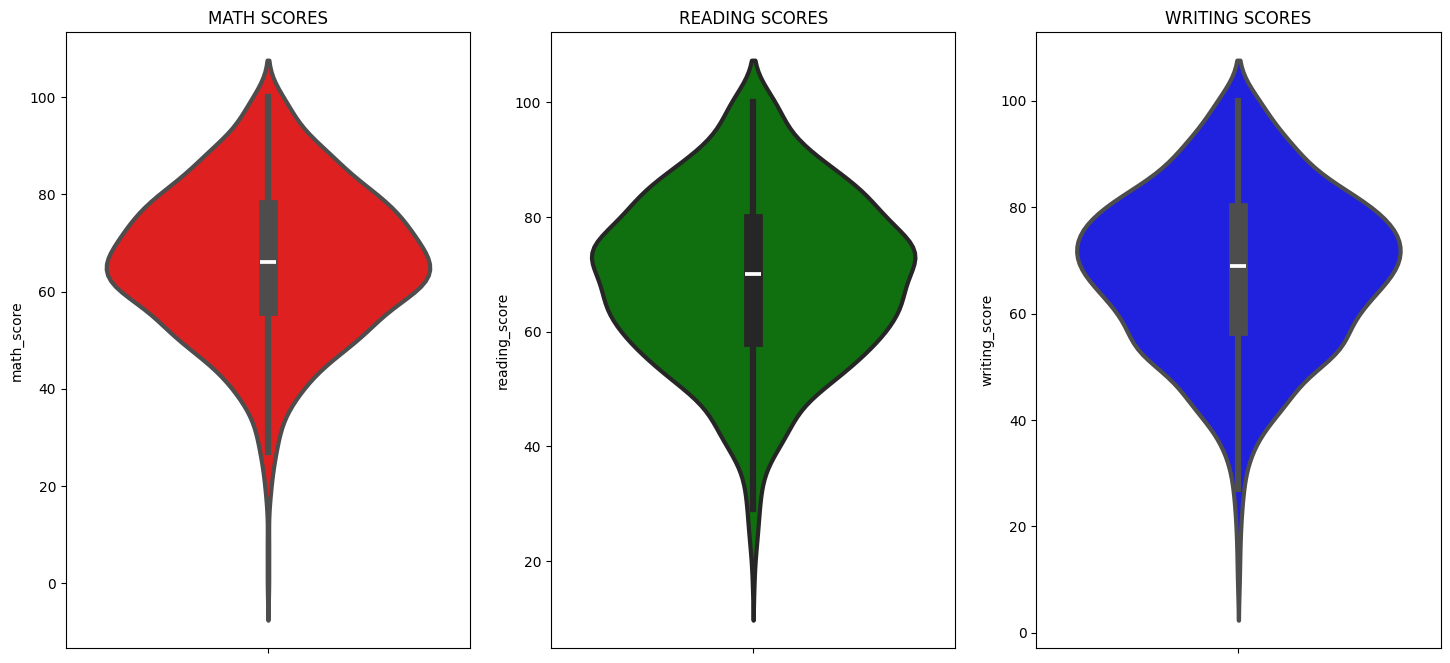

In [28]:
plt.figure(figsize=(24,8))
plt.subplot(1, 4, 1)
plt.title('MATH SCORES')
sns.violinplot(y='math_score',data=df,color='red',linewidth=3)
plt.subplot(1, 4, 2)
plt.title('READING SCORES')
sns.violinplot(y='reading_score',data=df,color='green',linewidth=3)
plt.subplot(1, 4, 3)
plt.title('WRITING SCORES')
sns.violinplot(y='writing_score',data=df,color='blue',linewidth=3)
plt.show()

**Insights**
<li>From the above three plots its clearly visible that most of the students score in between 60-80 in Maths whereas in reading and writing most of them score from 50-80</li>

<h2>4.3 Multivariate analysis using pieplot</h2>

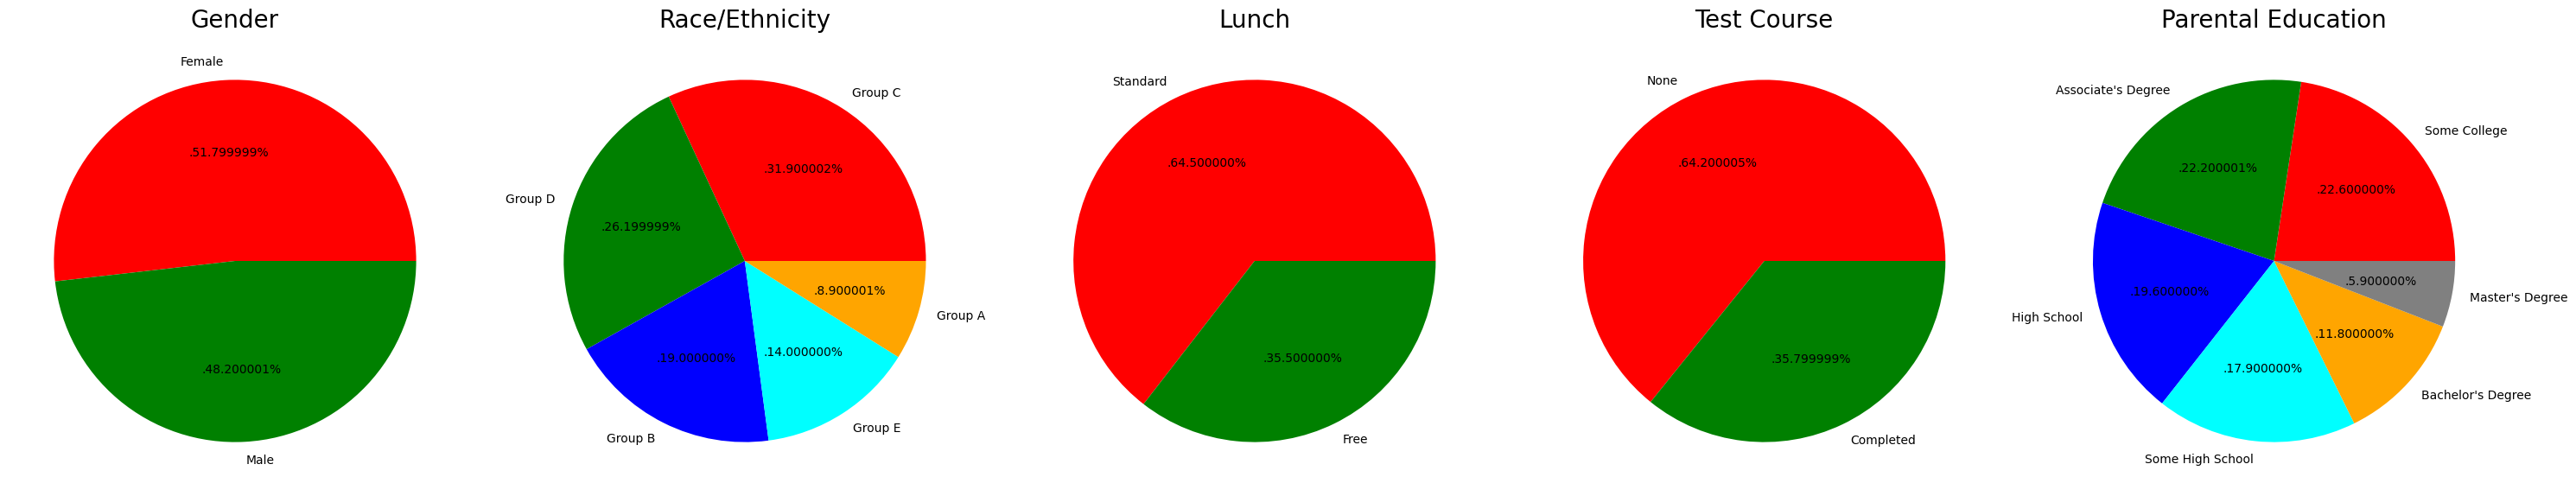

In [29]:
plt.rcParams['figure.figsize'] = (30, 12)

plt.subplot(1, 5, 1)
size = df['gender'].value_counts()
labels = 'Female', 'Male'
color = ['red','green']


plt.pie(size, colors = color, labels = labels,autopct = '.%2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 2)
size = df['race_ethnicity'].value_counts()
labels = 'Group C', 'Group D','Group B','Group E','Group A'
color = ['red', 'green', 'blue', 'cyan','orange']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Race/Ethnicity', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 3)
size = df['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Lunch', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 4)
size = df['test_preparation_course'].value_counts()
labels = 'None', 'Completed'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Test Course', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 5)
size = df['parental_level_of_education'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color = ['red', 'green', 'blue', 'cyan','orange','grey']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Parental Education', fontsize = 20)
plt.axis('off')


plt.tight_layout()
plt.grid()

plt.show()


**insights**
<li>Number of Male and Female students is almost equal</li>
<li>Number students are greatest in Group C</li>
<li>Number of students who have standard lunch are greater</li>
<li>Number of students who have not enrolled in any test preparation course is greater</li>
<li>Number of students whose parental education is "Some College" is greater followed closely by "Associate's Degree"</li>

<h2>4.4 Feature Wise Visualization</h2>

<h3>4.4.1 GENDER COLUMN</h3>

**UNIVARIATE ANALYSIS ( How is distribution of Gender ?**

C:\Users\Charles Ahmad\AppData\Local\Temp\ipykernel_19368\3516430482.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['gender'],data=df,palette ='bright',ax=ax[0],saturation=0.95)


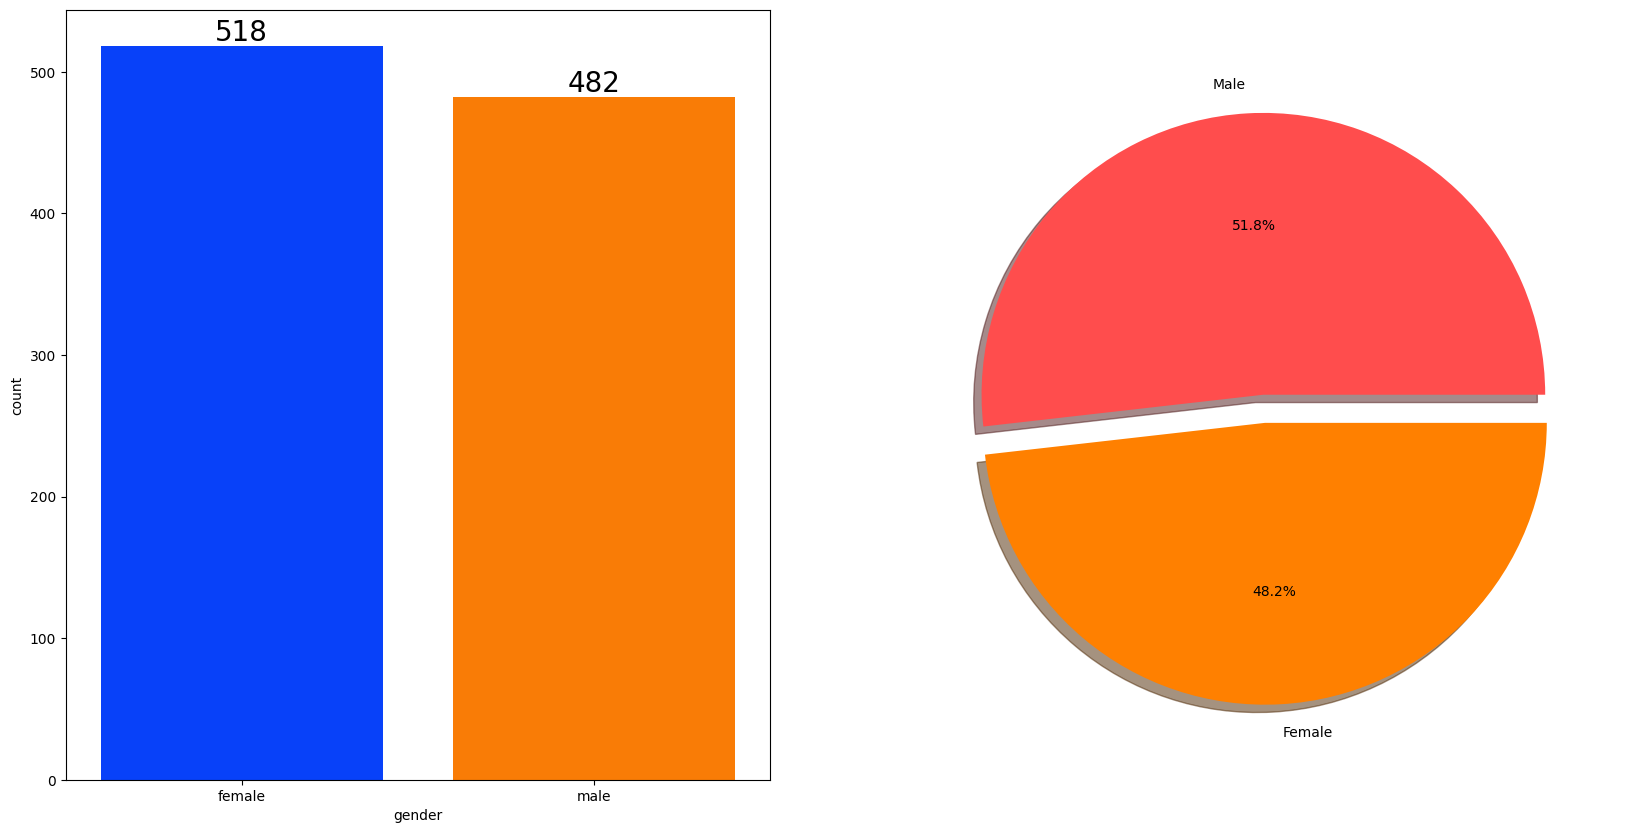

In [30]:
fig ,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['gender'],data=df,palette ='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x=df['gender'].value_counts(),labels=['Male','Female'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])
plt.show()

**Insights**
<li>Gender has balanced data with female students are 518 (48%) and male students are 482 (52%)</li>

**BIVARIATE ANALYSIS ( Is gender has any impact on student's performance ? )**

In [42]:
gender_group = df.groupby('gender')[['math_score','reading_score','writing_score','average']].mean()
gender_group

,math_score,reading_score,writing_score,average
gender,,,,
female,63.633205,72.608108,72.467181,69.569498
male,68.728216,65.473029,63.311203,65.837483


In [43]:
gender_group['math_score'][0]

C:\Users\Charles Ahmad\AppData\Local\Temp\ipykernel_19368\3379205318.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  gender_group['math_score'][0]


np.float64(63.633204633204635)

C:\Users\Charles Ahmad\AppData\Local\Temp\ipykernel_19368\2344496894.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  female_scores = [gender_group['average'][0], gender_group['math_score'][0]]
C:\Users\Charles Ahmad\AppData\Local\Temp\ipykernel_19368\2344496894.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  male_scores = [gender_group['average'][1], gender_group['math_score'][1]]


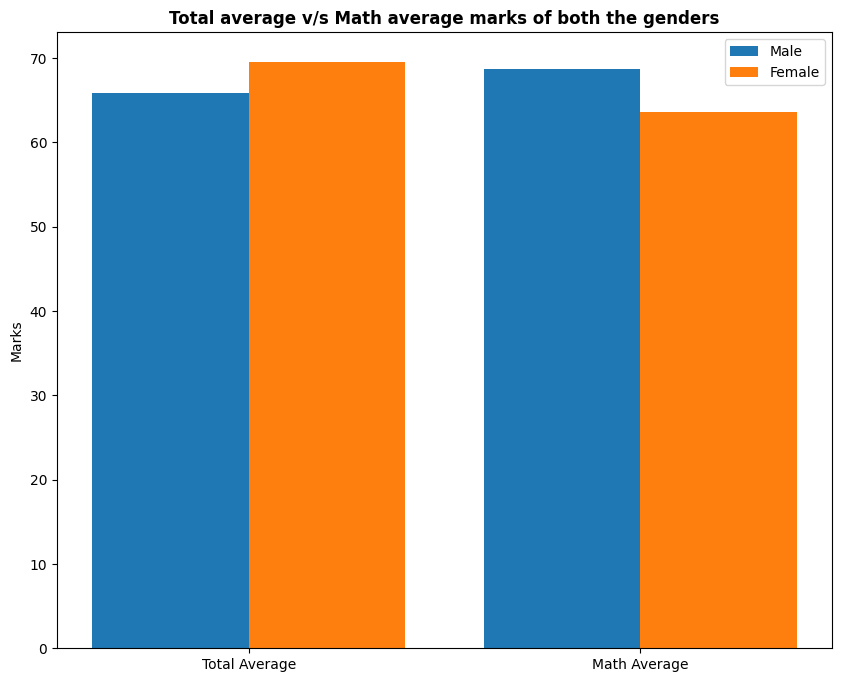

In [44]:
plt.figure(figsize=(10, 8))

X = ['Total Average','Math Average']


female_scores = [gender_group['average'][0], gender_group['math_score'][0]]
male_scores = [gender_group['average'][1], gender_group['math_score'][1]]

X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, male_scores, 0.4, label = 'Male')
plt.bar(X_axis + 0.2, female_scores, 0.4, label = 'Female')
  
plt.xticks(X_axis, X)
plt.ylabel("Marks")
plt.title("Total average v/s Math average marks of both the genders", fontweight='bold')
plt.legend()
plt.show()

**insights**
<li>secara umum, nilai wanita lebih tinggi daripada pria</li>
<li>sedangkan pria memiliki nilai yang lebih tinggi dibanding wanita di MTK</li>

<h3>4.4.2 RACE/ETHNICITY COLUMN</h3>

<li>How is Group wise distribution ?</l1>
<li>Is Race/Ehnicity has any impact on student's performance ?</l1>

C:\Users\Charles Ahmad\AppData\Local\Temp\ipykernel_19368\2697237789.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['race_ethnicity'],data=df,palette = 'bright',ax=ax[0],saturation=0.95)


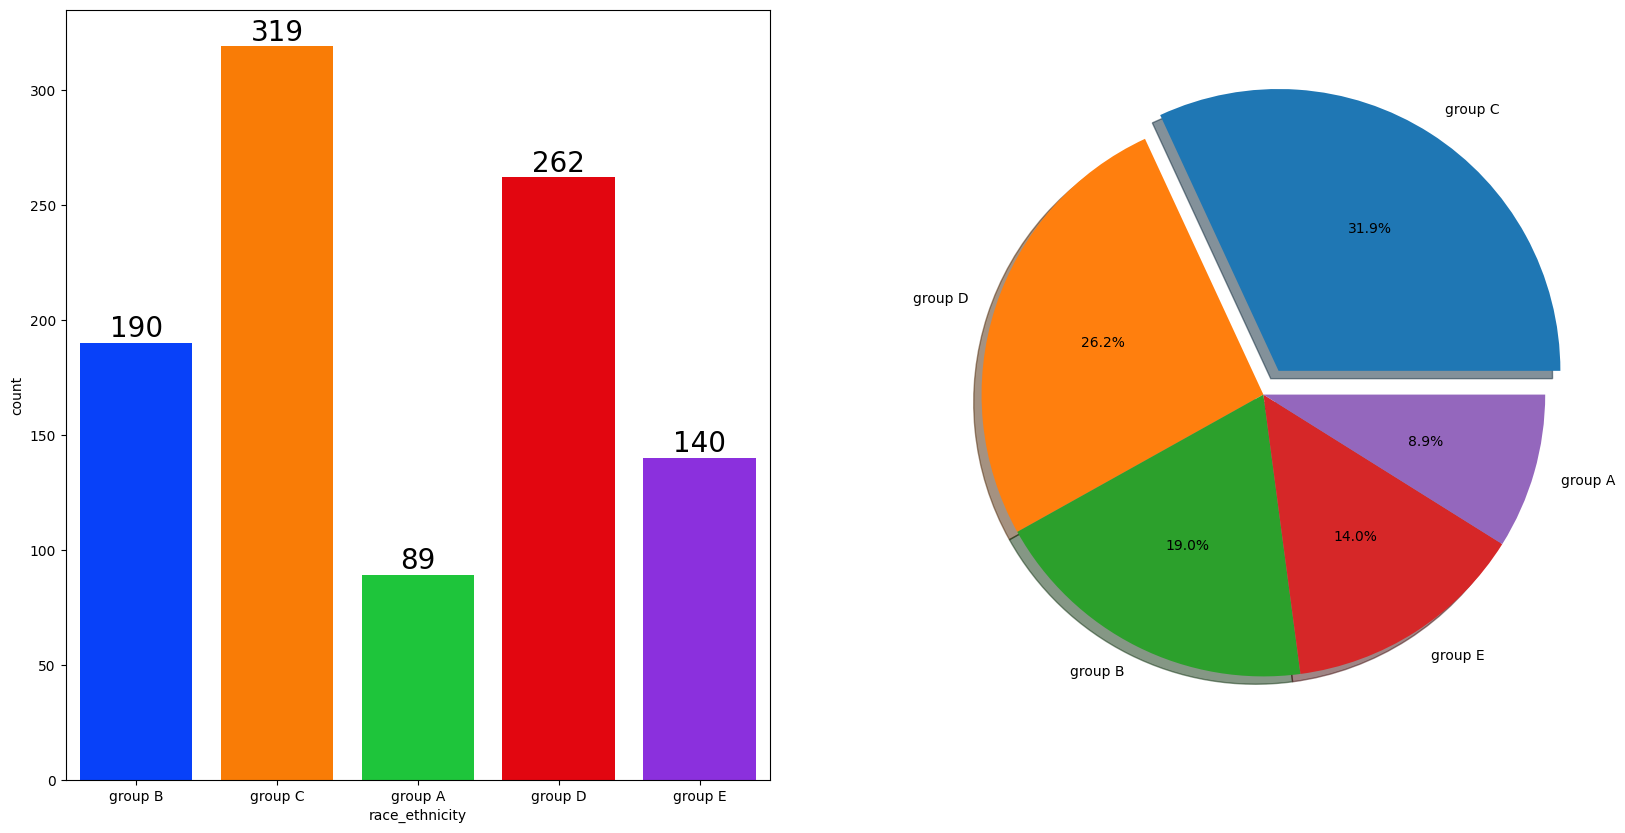

In [ ]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x='race_ethnicity',data=df,palette = 'bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x = df['race_ethnicity'].value_counts(),labels=df['race_ethnicity'].value_counts().index,explode=[0.1,0,0,0,0],autopct='%1.1f%%',shadow=True)
plt.show()   

**Insights**
<li>kebanyakan siswa/siswi berasal dari group C  group D.</li>
<li>siswa/siswa paling sedikit dari group A</li>

**BIVARIATE ANALYSIS ( apakah ras memiliki pengaruh terhadap performa siswa/siswi? )**

C:\Users\Charles Ahmad\AppData\Local\Temp\ipykernel_19368\827462696.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=Group_data2['math_score'].mean().index,y=Group_data2['math_score'].mean().values,palette = 'mako',ax=ax[0])
C:\Users\Charles Ahmad\AppData\Local\Temp\ipykernel_19368\827462696.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=Group_data2['reading_score'].mean().index,y=Group_data2['reading_score'].mean().values,palette = 'flare',ax=ax[1])
C:\Users\Charles Ahmad\AppData\Local\Temp\ipykernel_19368\827462696.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=Fa

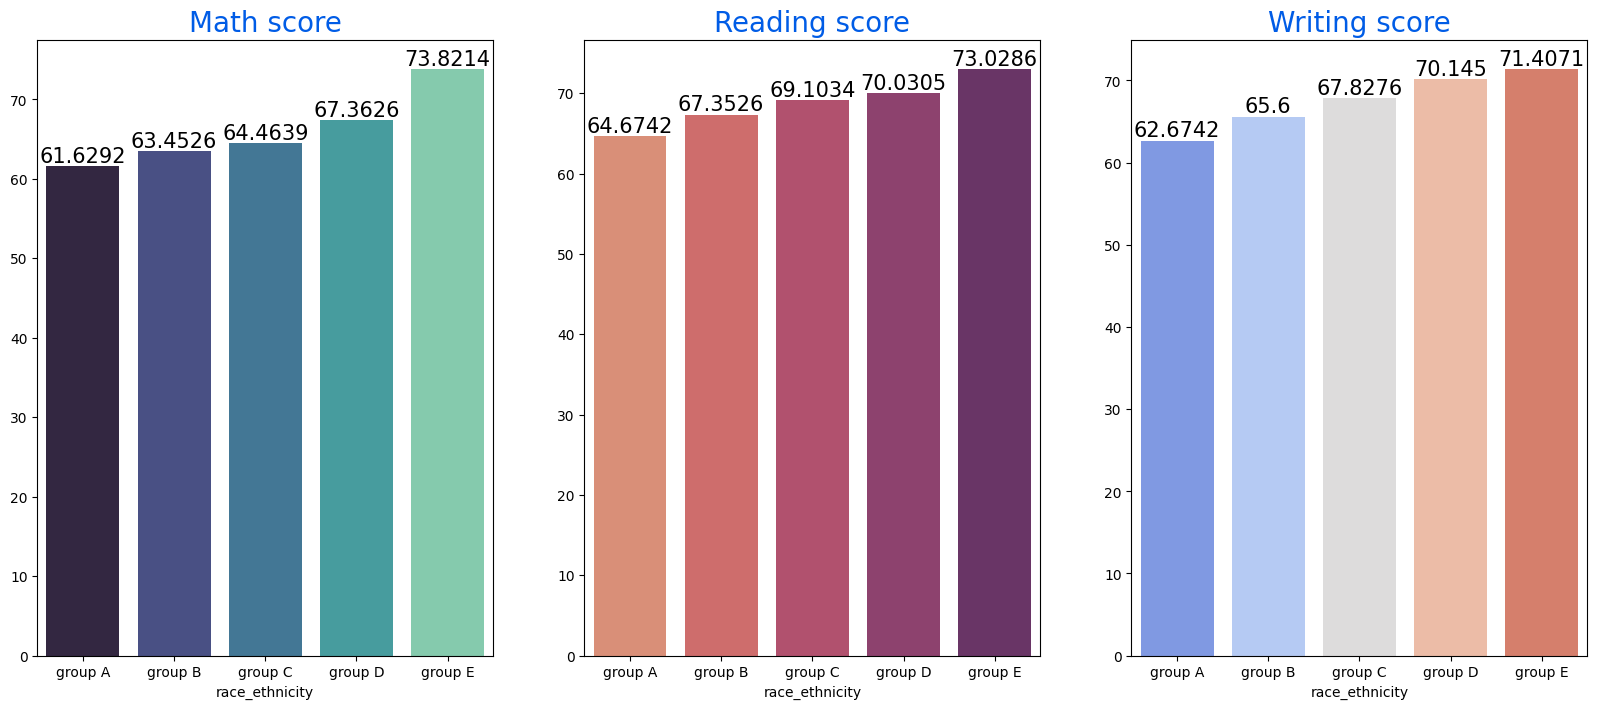

In [48]:
Group_data2=df.groupby('race_ethnicity')
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.barplot(x=Group_data2['math_score'].mean().index,y=Group_data2['math_score'].mean().values,palette = 'mako',ax=ax[0])
ax[0].set_title('Math score',color='#005ce6',size=20)

for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['reading_score'].mean().index,y=Group_data2['reading_score'].mean().values,palette = 'flare',ax=ax[1])
ax[1].set_title('Reading score',color='#005ce6',size=20)

for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['writing_score'].mean().index,y=Group_data2['writing_score'].mean().values,palette = 'coolwarm',ax=ax[2])
ax[2].set_title('Writing score',color='#005ce6',size=20)

for container in ax[2].containers:
    ax[2].bar_label(container,color='black',size=15)

**insights**
<li>siswa/siswi dari grup A memiliki nilai terendah di semua subjek</li>
<li>siswa/siswi dari grup E memiliki nilai tertinggi di semua subjek</li>

<h3>4.4.3 PARENTAL LEVEL OF EDUCATION COLUMN</h3>

<li>What is educational background of student's parent ?</li>
<li>Is parental education has any impact on student's performance ?</li>

C:\Users\Charles Ahmad\AppData\Local\Temp\ipykernel_19368\4064102877.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df,x='parental_level_of_education',palette = 'bright')


Text(0.5, 1.0, 'Parental level of education')

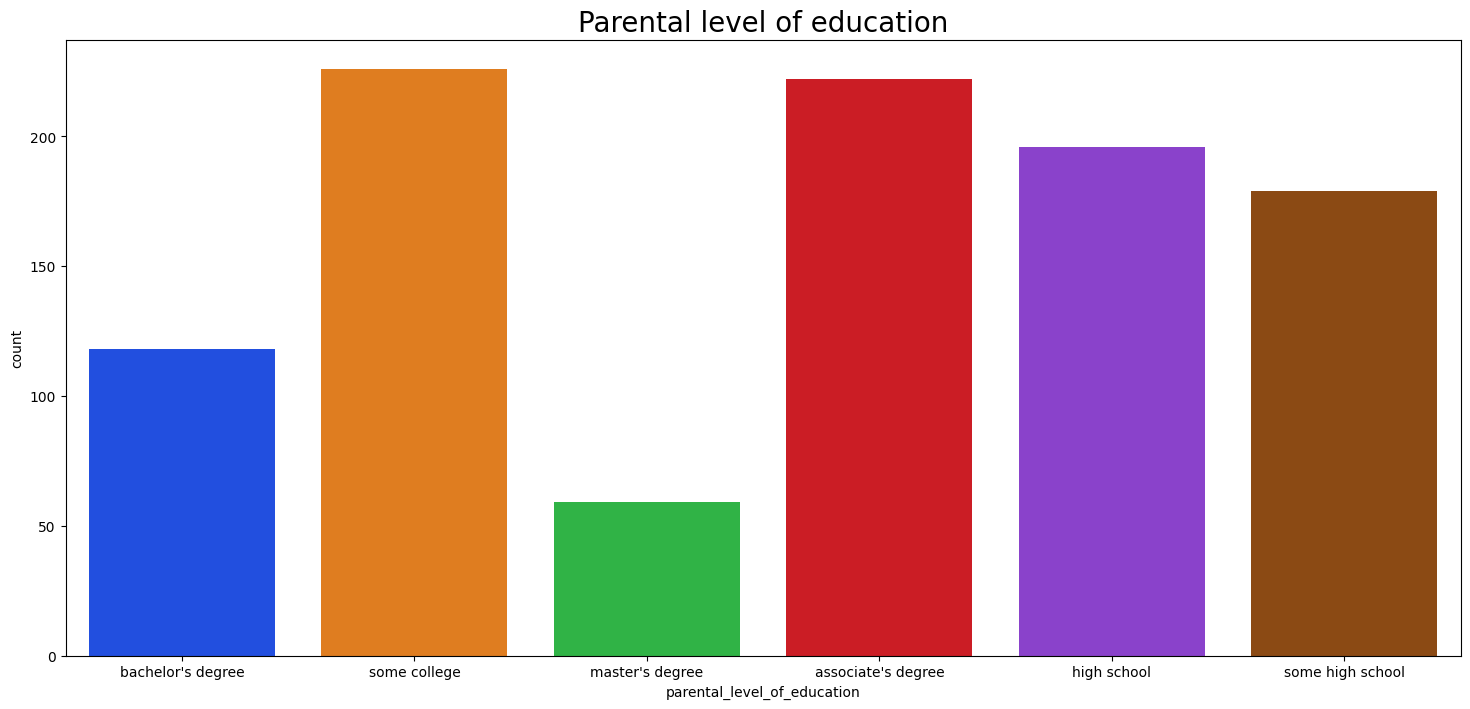

In [64]:
plt.figure(figsize=(18, 8))
sns.countplot(data=df,x='parental_level_of_education',palette = 'bright')
plt.title('Parental level of education',size=20)

**insights**
<li>kebanyakan siswa/siswa orang tuanya memiliki latar pendidikan dari universitas (some college)</li>

**BIVARIATE ANALYSIS (apakah latar pendidikan orang tua memiliki impact terhadap nilai mahasiswa? )**

In [66]:
group_data3 = df.groupby('parental_level_of_education')

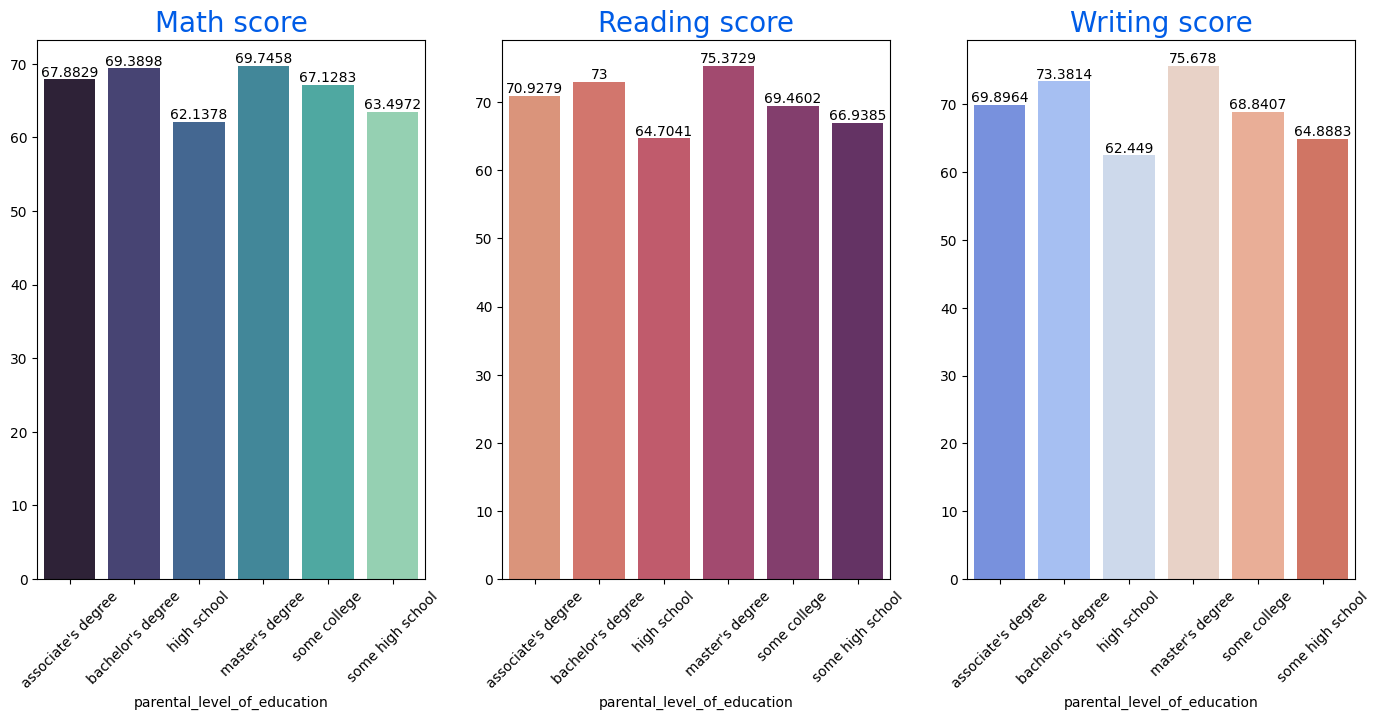

In [82]:
fig, ax = plt.subplots(1, 3, figsize=(17, 7)) # create a figure with size 17x7 and it can contain 1 row and 2 columns of subplot

sns.barplot(x=group_data3['math_score'].mean().index, y=group_data3['math_score'].mean().values, palette = 'mako', ax=ax[0])
ax[0].set_title('Math score', color='#005ce6', size=20)

for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size=10)
    ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=45) 

sns.barplot(x=group_data3['reading_score'].mean().index, y=group_data3['reading_score'].mean().values, palette='flare', ax=ax[1])
ax[1].set_title('Reading score', color='#005ce6', size=20)

for container in ax[1].containers:
    ax[1].bar_label(container, color='black', size=10)
    ax[1].set_xticklabels(ax[0].get_xticklabels(), rotation=45) 

sns.barplot(x=group_data3['writing_score'].mean().index, y=group_data3['writing_score'].mean().values, palette='coolwarm', ax=ax[2])
ax[2].set_title('Writing score', color='#005ce6', size=20)

for container in ax[2].containers:
    ax[2].bar_label(container, color='black', size=10)
    ax[2].set_xticklabels(ax[0].get_xticklabels(), rotation=45) 

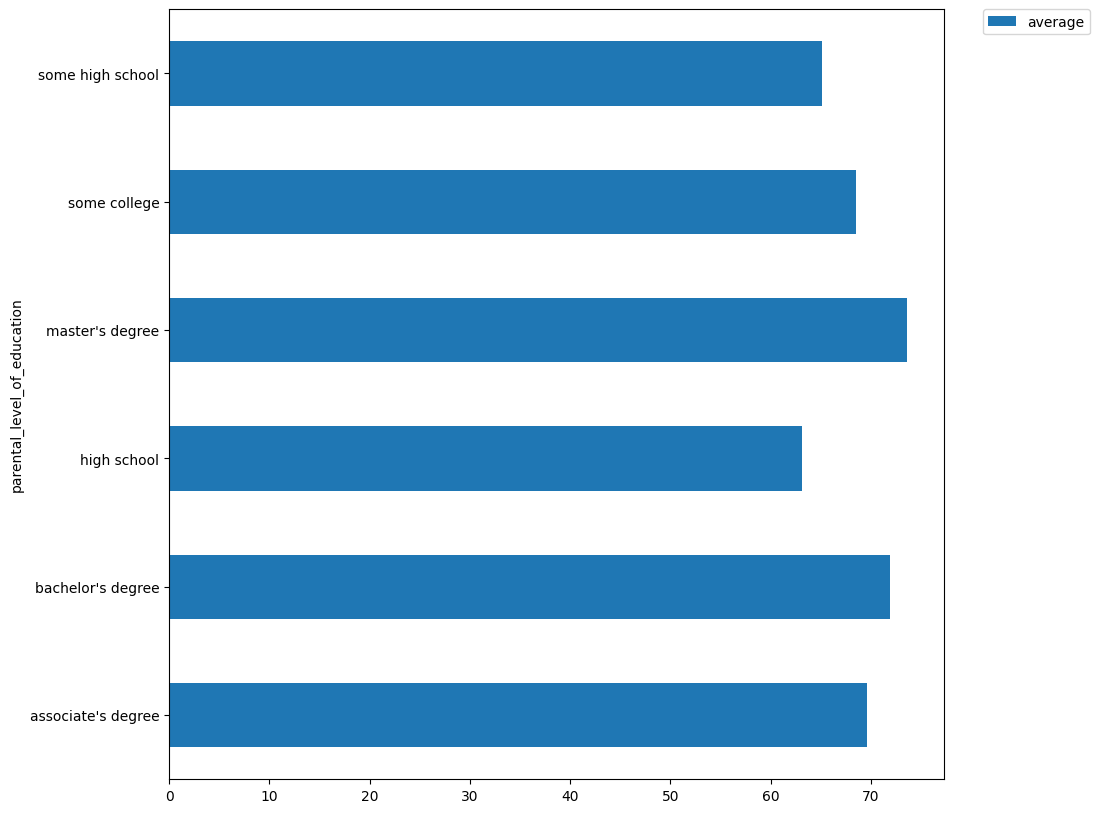

In [80]:
df.groupby('parental_level_of_education')['average'].agg('mean').plot(kind='barh',figsize=(10,10))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

**insights**
<li>dari kedua diagram di atas, dapat disimpulkan siswa dengan latar pendidikan orang tua siswa yang memiliki gelar bachelor dan master nilainya cenderung lebih tinggi</li>
<li>dan yang latar pendidikannya highschool nilainya cenderung lebih rendah</li>

<h3>4.4.4 LUNCH COLUMN</h3>

<li>tipe lunch apa yang paling banyak diantara semua siswa/siswi?</li>
<li>apakah ada pengaruh antara tipe lunch dengan performa nilai siswa/siswi?</li>

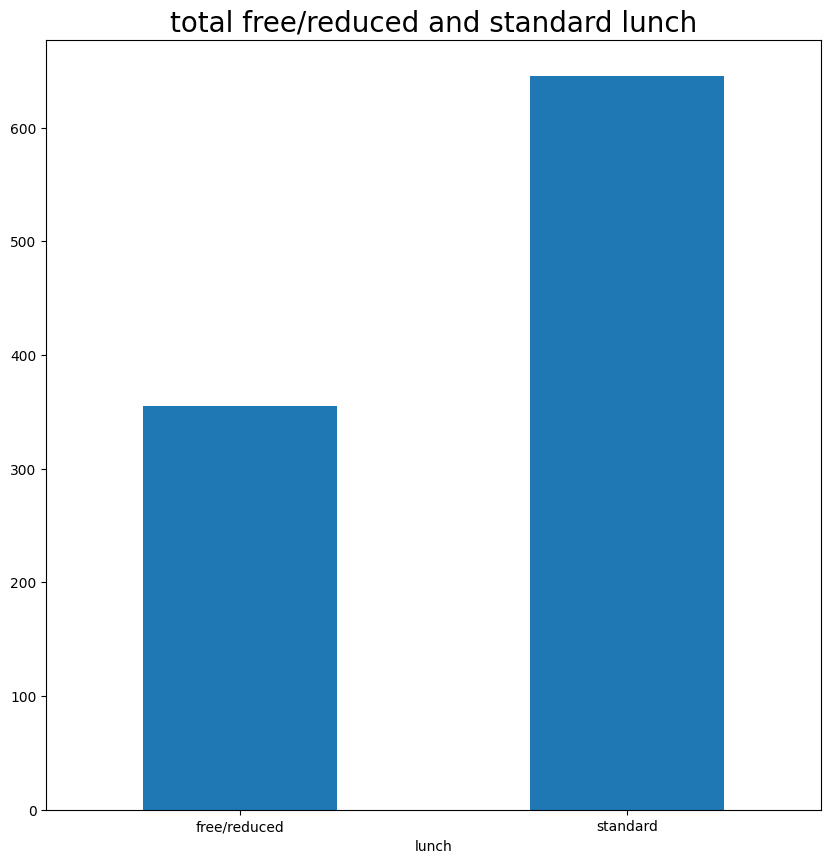

In [89]:
df.groupby('lunch')['lunch'].agg('count').plot(kind='bar',figsize=(10,10), rot=0)
plt.title('total free/reduced and standard lunch',size=20)
plt.show()

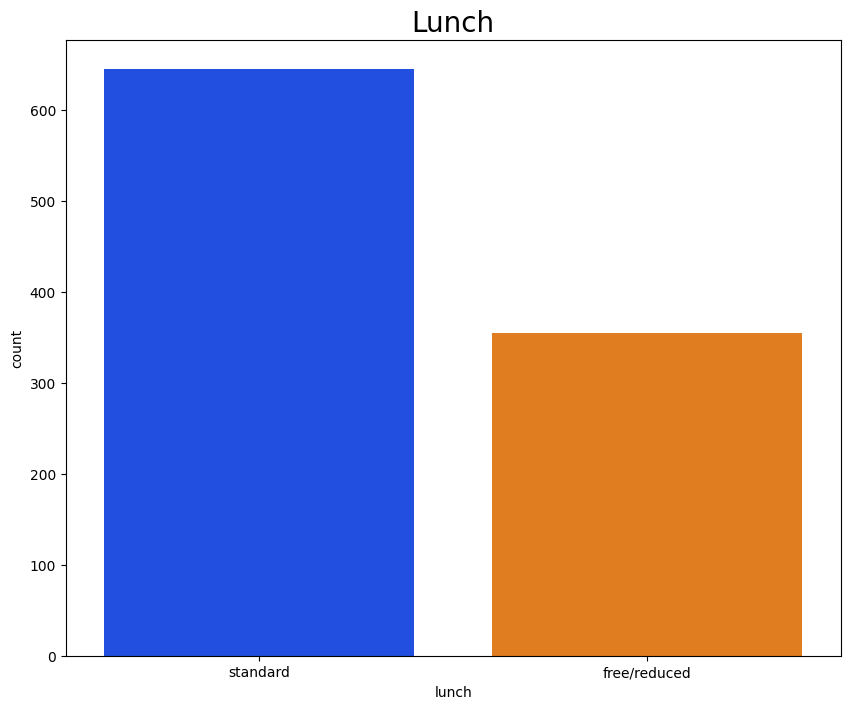

In [ ]:
plt.figure(figsize=(10, 8))
sns.countplot(data=df, x='lunch', palette = 'bright')

plt.title('total free/reduced and standard lunch', size=20)
plt.show()

In [ ]:
# f,ax=plt.subplots(1,2,figsize=(20,8))
# sns.countplot(x=df['parental_level_of_education'],data=df,palette = 'bright',hue='test_preparation_course',saturation=0.95,ax=ax[0])
# ax[0].set_title('Students vs test preparation course ',color='black',size=25)
# for container in ax[0].containers:
#     ax[0].bar_label(container,color='black',size=20)
#     ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=45)
    
# sns.countplot(x=df['parental_level_of_education'],data=df,palette = 'bright',hue='lunch',saturation=0.95,ax=ax[1])
# ax[1].set_title('Students vs lunch',color='black',size=25)
# for container in ax[1].containers:
#     ax[1].bar_label(container,color='black',size=20)
#     ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=45)

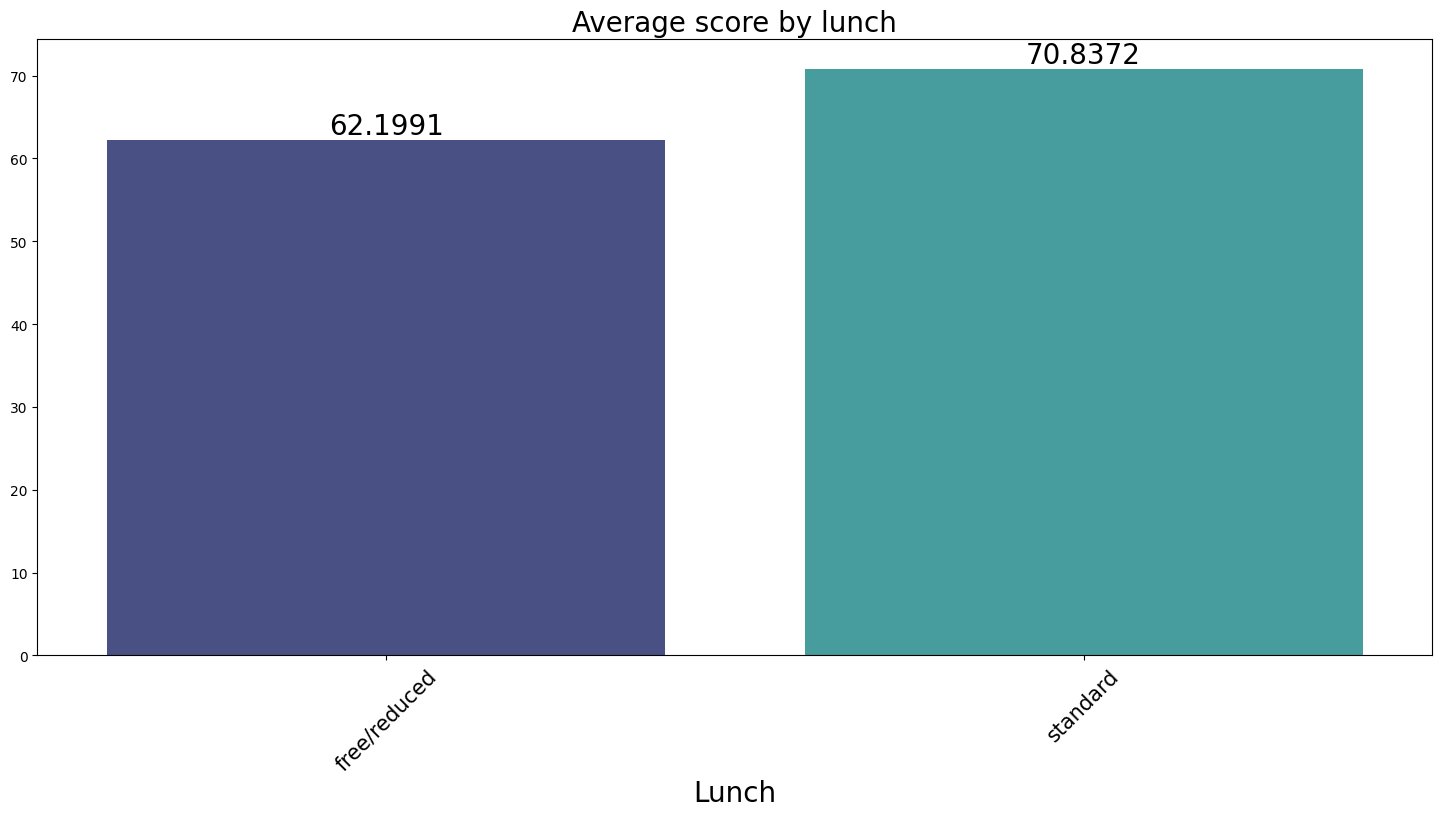

In [ ]:
group_data4 = df.groupby('lunch')

plt.figure(figsize=(18, 8)) # create a figure with size 18x8

bar_plot = sns.barplot(x=group_data4['average'].mean().index, y=group_data4['average'].mean().values, palette = 'mako')

for container in bar_plot.containers:
    bar_plot.bar_label(container, color='black', size=20)
    bar_plot.set_xticklabels(bar_plot.get_xticklabels(), rotation=45, size=15 )
    bar_plot.set_title('Average score by lunch', size=20)
    bar_plot.set_xlabel('Lunch', size=20)

**insights**
<li>lebih banyak siswa/siswi yang memiliki tipe lunch standard</li>
<li>siswa/siswi yang memiliki tipe lunch standard memiliki nilai yang cenderung lebih baik</li>

<h3>4.4.5 TEST PREPARATION COURSE COLUMN</h3>

<li>Which type of lunch is most common amoung students ?</li>
<li>Is Test prepration course has any impact on student's performance ?</li>

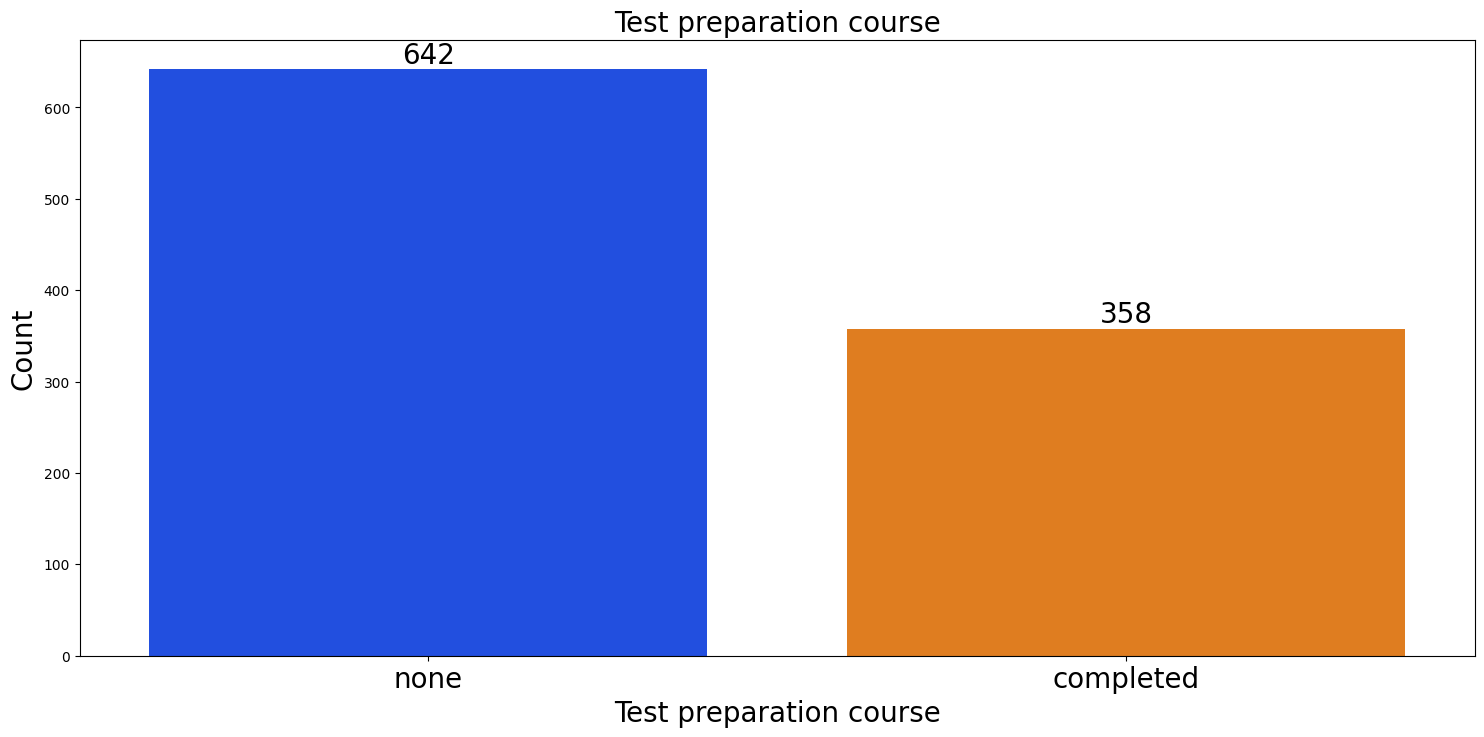

In [114]:
plt.figure(figsize=(18, 8)) # create a figure with size 18x8

count_plot = sns.countplot(x=df['test_preparation_course'], data=df, palette = 'bright')

for container in count_plot.containers:
    count_plot.bar_label(container, color='black', size=20)
    count_plot.set_xticklabels(count_plot.get_xticklabels(), size=20 )
    count_plot.set_title('Test preparation course', size=20)
    count_plot.set_xlabel('Test preparation course', size=20)
    count_plot.set_ylabel('Count', size=20)



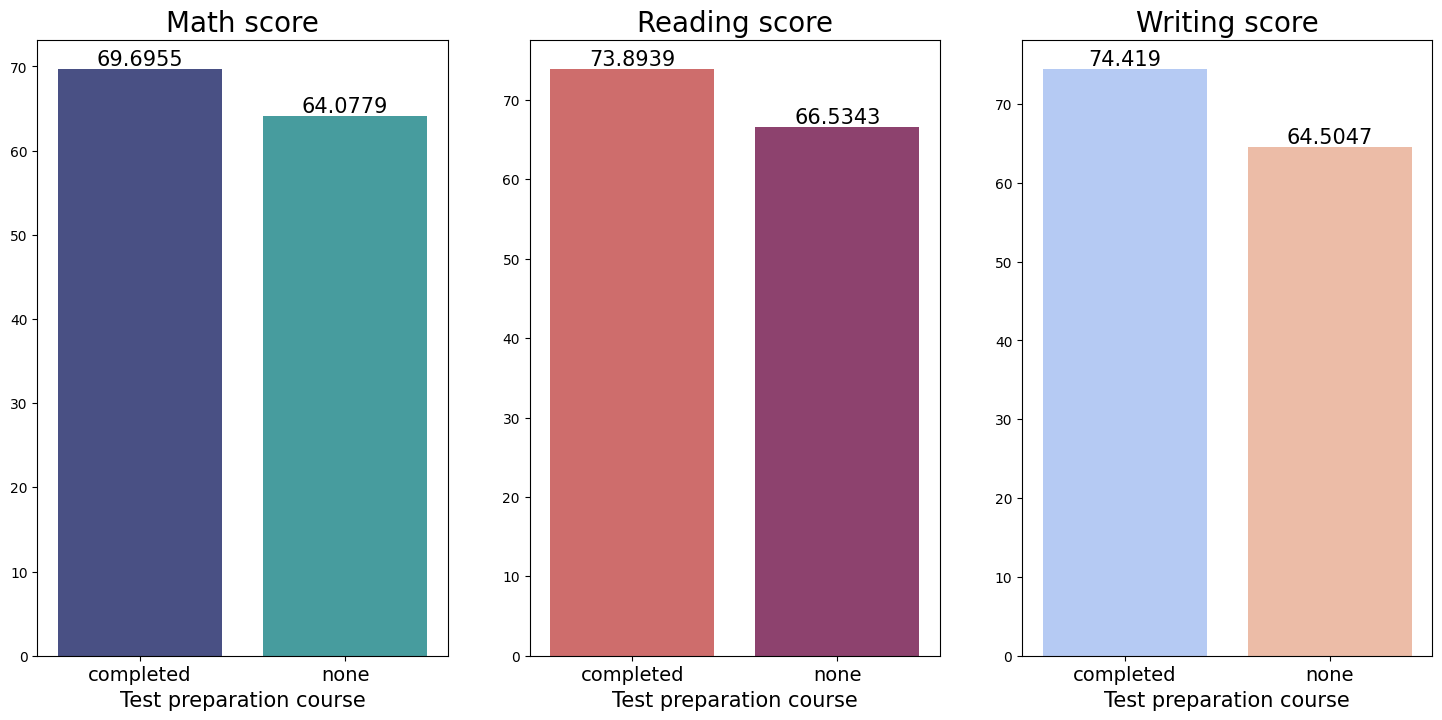

In [120]:
fig, ax = plt.subplots(1, 3, figsize=(18, 8)) # create a figure with size 18x8 and it can contain 1 row and 3 columns of subplofig.set_label()

sns.barplot(x=df.groupby('test_preparation_course')['math_score'].mean().index, y=df.groupby('test_preparation_course')['math_score'].mean().values, palette = 'mako', ax=ax[0])
ax[0].set_title('Math score', size=20)

for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size=15)
    ax[0].set_xticklabels(ax[0].get_xticklabels(), size=14)
    ax[0].set_xlabel('Test preparation course', size=15)

sns.barplot(x=df.groupby('test_preparation_course')['reading_score'].mean().index, y=df.groupby('test_preparation_course')['reading_score'].mean().values, palette = 'flare', ax=ax[1])
ax[1].set_title('Reading score', size=20)

for container in ax[1].containers:
    ax[1].bar_label(container, color='black', size=15)
    ax[1].set_xticklabels(ax[1].get_xticklabels(), size=14) 
    ax[1].set_xlabel('Test preparation course', size=15)

sns.barplot(x=df.groupby('test_preparation_course')['writing_score'].mean().index, y=df.groupby('test_preparation_course')['writing_score'].mean().values, palette = 'coolwarm', ax=ax[2])
ax[2].set_title('Writing score', size=20)

for container in ax[2].containers:
    ax[2].bar_label(container, color='black', size=15)
    ax[2].set_xticklabels(ax[2].get_xticklabels(), size=14)
    ax[2].set_xlabel('Test preparation course', size=15)

**insights**
<li>kebanyakan siswa/siswi telah melakukan test preparation course</li>
<li>siswa/siswi yang melakukan test preparation course cenderung memiliki nilai yang lebih baik</li>

<h3>4.4.6 CHECKING OUTLIERS</h3>

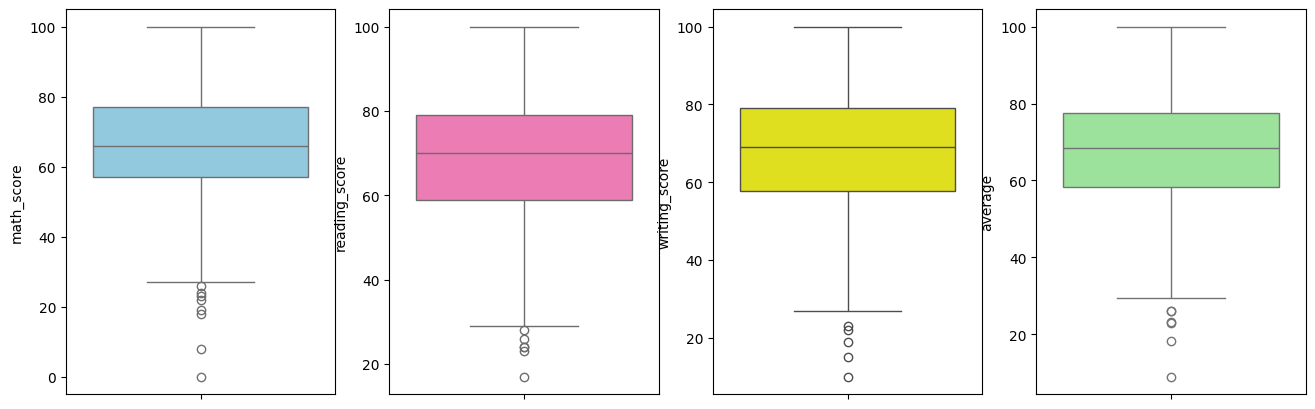

In [122]:
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(df['math_score'],color='skyblue')
plt.subplot(142)
sns.boxplot(df['reading_score'],color='hotpink')
plt.subplot(143)
sns.boxplot(df['writing_score'],color='yellow')
plt.subplot(144)
sns.boxplot(df['average'],color='lightgreen')
plt.show()

<h3>4.4.7 MUTIVARIATE ANALYSIS USING PAIRPLOT</h3>

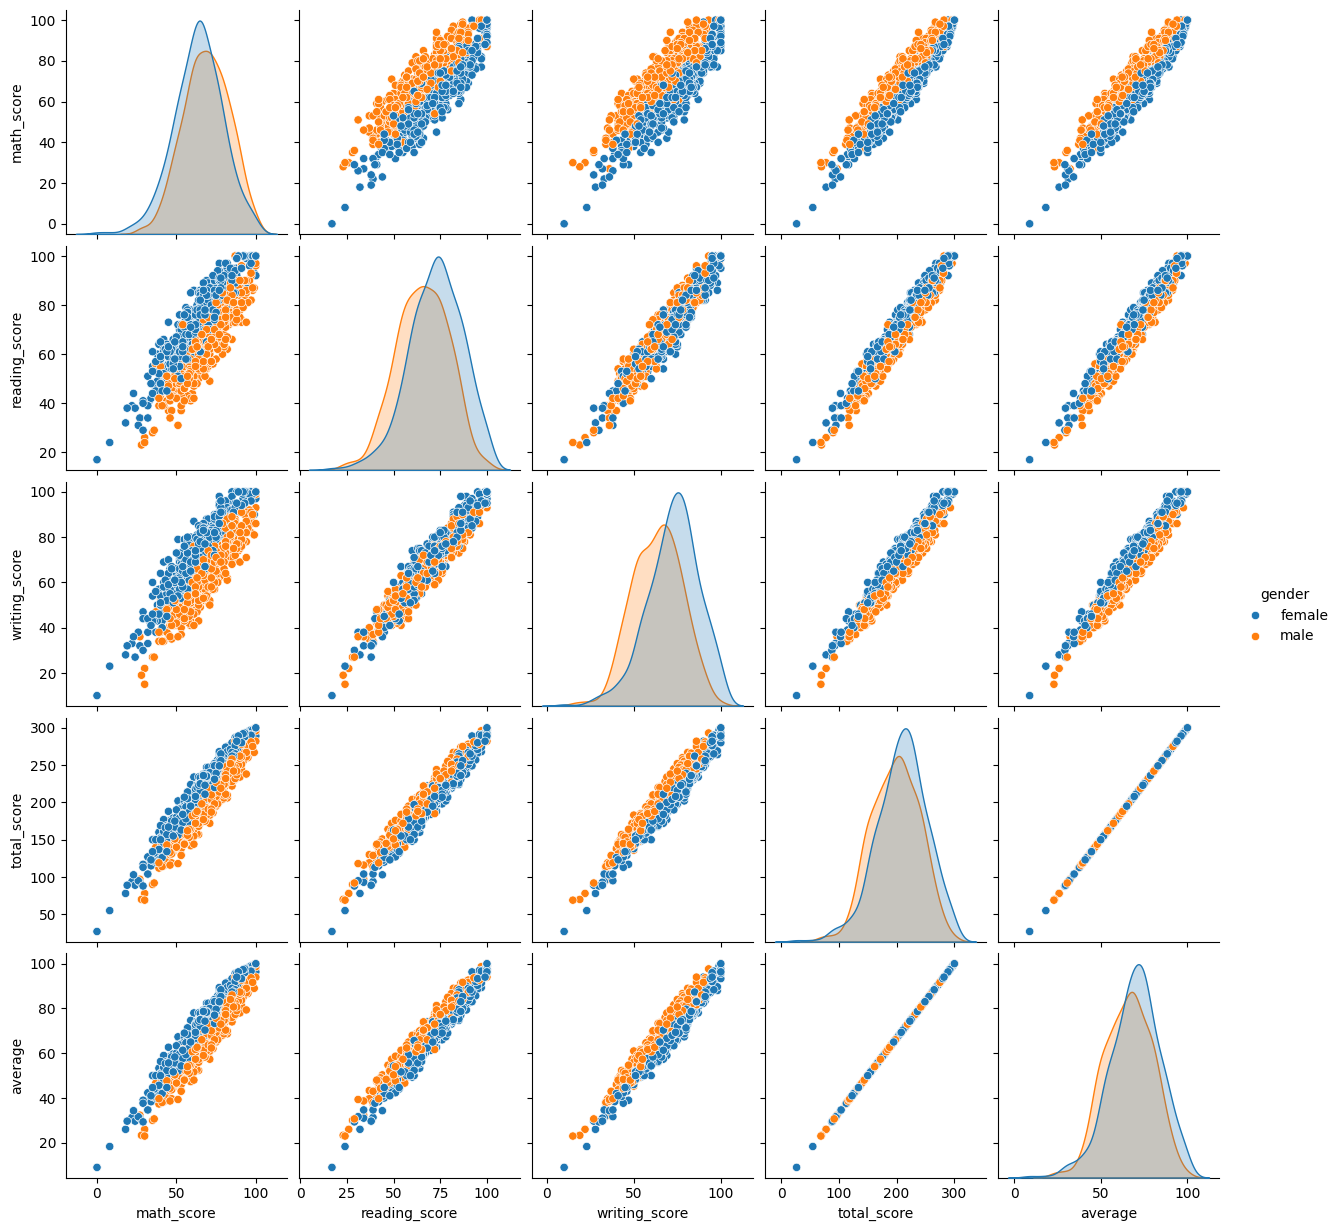

In [123]:
sns.pairplot(df,hue = 'gender')
plt.show()

**Insights**
<li>dari plot-plot di atas bisa dilihat bahwa baik untuk gender wanita dan pria setiap masing-masing score secara linear berbanding lurus satu sama lain</li>